Giới thiệu về bài toán : 
Xây dựng các mô hình có khả năng dự đoán mức độ béo phì của một người từ các thông tin đầu vào cần thiết.

Bộ dữ liệu bao gồm dữ liệu để ước tính mức độ béo phì ở các cá nhân từ các quốc gia Mexico, Peru và Colombia, dựa trên thói quen ăn uống và tình trạng thể chất của họ.

Dữ liệu chứa 17 thuộc tính và 2111 bản ghi, các bản ghi được gán nhãn bằng biến lớp NObesity (Mức độ béo phì), cho phép phân loại dữ liệu bằng các giá trị Insufficient Weight (Thiếu cân), Normal Weight (Cân nặng bình thường), Overweight Level I (Thừa cân cấp độ I), Overweight Level II (Thừa cân cấp độ II), Obesity Type I (Béo phì loại I), Obesity Type II (Béo phì loại II) và Obesity Type III (Béo phì loại III)

PART 1: PHÂN TÍCH, TÌM HIỂU VỀ BỘ DỮ LIỆU CỦA BÀI TOÁN


1.1  NGHĨA CỦA CÁC FEATURES
Mổi mẫu trong bộ dữ liệu bao gồm có 16 features bao gồm :
1. Gender (Categorical) : giới tính
2. Age (Continuous): tuổi
3. Height (Continuous): chiều cao
4. Weight (Continuous): cân nặng
5. family_history_with_overweight (Binary) : Có thành viên nào trong gia đình đã từng hoặc đang mắc bệnh béo phì hay không
6. FAVC (Binary): Có tiêu thụ thực phẩm nhiều calo thường xuyên không ?
7. FCVC (Categorical): Mức độ thường xuyên kết hợp rau củ quả trong bữa ăn hay không
8. NCP (Continuous): Có bao nhiêu bữa ăn chính trong một ngày
9. CAEC (Categorical): Mức độ thường xuyên ăn các món ăn vặt khác ngoài bữa ăn
10. SMOKE (Binary): Có hút thuốc hay không ?
11. CH20 (Continuous): Lượng nước tiêu thụ mỗi ngày
12. SCC (Binary): Có kiểm soát lượng calo tiêu thụ mỗi ngày không ?
13. FAF (Continuous): Thời gian tham tham gia các hoạt động thể chất trong ngày ?
14. TUE (Integer): Số giờ dành thời gian có các thiệt bị công nghệ mỗi ngày
15. CALC (Categorical): Mức độ thường xuyên sử dụng đồ uống có cồn
16. MTRANS (Categorical): Loại phương tiện đi lại thường được sử dụng

Và một target là:

17. NObeyesdad (Categorical) bao gồm các giá trị:

    1. Insufficient Weight : Thiếu cân

    2. Normal Weight : Cân nặng bình thường

    3. Overweight Level I : Thừa cân mức độ I

    4. Overweight Level II: Thừa cân mức độ II

    5. Obesity Type I : Béo phì mức độ I

    6. Obesity Type II : Béo phì mức độ II
    
    7. Obesity Type III : Béo phì  mức độ III

ĐỒ THỊ THỐNG KÊ SỐ LƯỢNG MẪU Ở TỪNG MỨC ĐỘ BÉO PHÌ


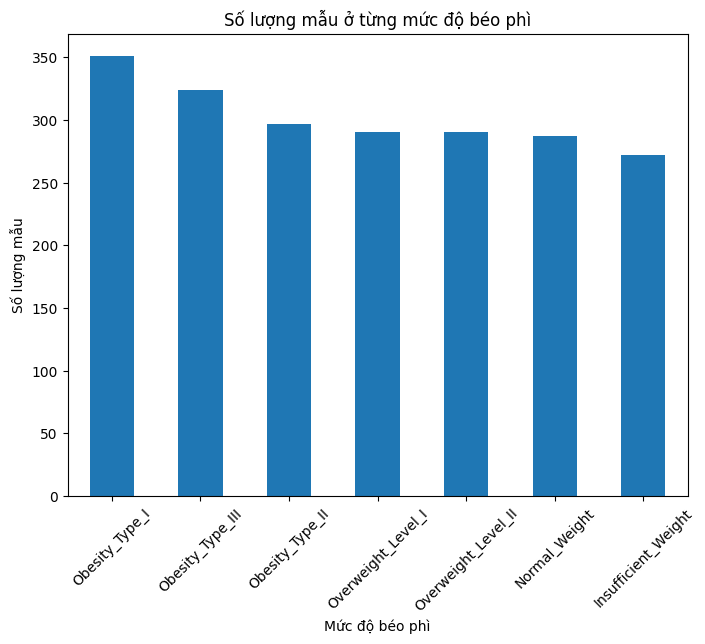

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file csv
data = pd.read_csv('data.csv')

# Tạo bảng thống kê số lượng mẫu ở từng mức độ béo phì
obesity_counts = data['NObeyesdad'].value_counts()

# Vẽ đồ thị
plt.figure(figsize=(8, 6))
obesity_counts.plot(kind='bar')
plt.title('Số lượng mẫu ở từng mức độ béo phì')
plt.xlabel('Mức độ béo phì')
plt.ylabel('Số lượng mẫu')
plt.xticks(rotation=45)
plt.show()

Qua đồ thị trên, ta nhận thấy mức số lượng mẫu ở từng mức độ béo phì khá đồng đều nhau, điều đó là một thuộc tính của bộ dữ liệu, vì nó sẽ giúp cho quá trình huấn luyện mô hình dựa trên bộ dữ liệu này không bị học quá lệch về một mức độ béo phì nào. Từ đó, tăng khả năng phân loại chính xác hơn cho mô hình.

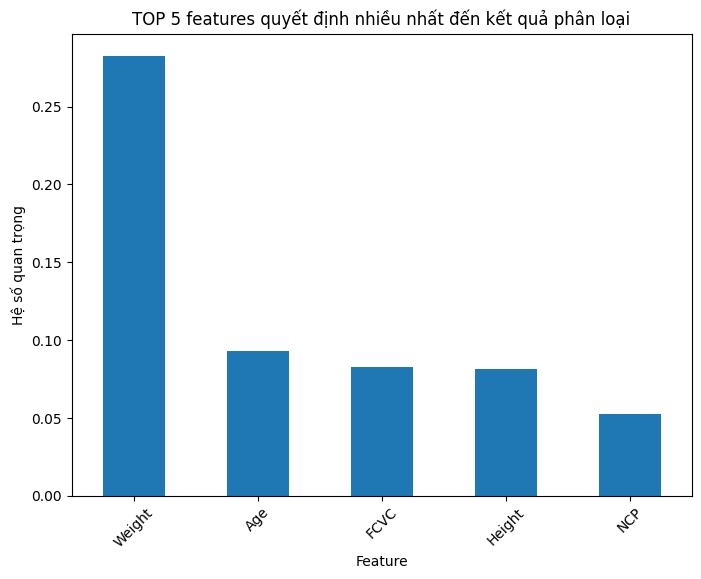

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Đọc dữ liệu từ file csv
data = pd.read_csv('data.csv')

# Chia dữ liệu thành features (X) và nhãn (y)
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Chuyển đổi dữ liệu chuỗi thành dữ liệu số
X = pd.get_dummies(X)

# Huấn luyện mô hình RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Lấy hệ số quan trọng từ mô hình
importance_scores = model.feature_importances_

# Tạo pandas Series từ hệ số quan trọng
importance_series = pd.Series(importance_scores, index=X.columns)

# Sắp xếp theo hệ số quan trọng giảm dần
sorted_features = importance_series.sort_values(ascending=False)

# Lấy 5 features quan trọng nhất
top_features = sorted_features[:5]

# Vẽ đồ thị
plt.figure(figsize=(8, 6))
top_features.plot(kind='bar')
plt.title('TOP 5 features quyết định nhiều nhất đến kết quả phân loại')
plt.xlabel('Feature')
plt.ylabel('Hệ số quan trọng')
plt.xticks(rotation=45)
plt.show()

Qua đồ thị trên, ta có thể thấy được mức độ quan trọng của các features đến kết quả phân loại của một mẫu, cụ thể top 5 features quan trọng nhất lần lượt là:
1. Weight
2. Age
3. FCVC
4. Height
5. NCP

PART 2: ỨNG DỤNG CÁC MÔ HÌNH HỌC MÁY ĐỂ GIẢI QUYẾT BÀI TOÁN

CÁC THƯ VIỆN CẦN THIẾT

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras import regularizers

THỰC HIỆN QUÁ TRÌNH TIỀN XỬ LÍ DỮ LIỆU

ĐỌC DỮ LIỆU

In [75]:
filename = "data.csv"
df = pd.read_csv(filename,delimiter=',')

In [76]:
#Thông tin về features và target
#Get the list of column names
columns = df.columns.tolist()

#The name of feature and target columns
features = columns[:-1]
target = columns[-1]

print(features)
print(target)

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
NObeyesdad


THỰC HIỆN CÁC THAO TÁC TIỀN XỬ LÝ CHO DỮ LIỆU

CLEANING DATA

In [77]:
#Xoá dữ liệu trùng lập nếu có
df.drop_duplicates(inplace=True)

#Xoá các dòng có dữ liệu bị thiếu
df.dropna(inplace=True) 

DATA TRANSFORMATION

In [78]:
#Chọn ra các cột cần được transform

#Tui chưa enconde biến target -> Tuỳ nhu cầu,coi nếu cần thì thêm vào đây để encode nhe
columns_to_encode = ['Gender', 'family_history_with_overweight','FAVC','CAEC', 'SMOKE','SCC','CALC', 'MTRANS']
# Khỏi tạo LabelEncoder object
label_encoder = LabelEncoder()

#Thực hiện label encoder cho mỗi cột
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


DATA NORMALIZATION

In [79]:
#Data normalization

#Chọn ra các cột cần được chuyển hoá
columns_to_normalized = ['Age', 'Height', 'Weight', 'CH2O','FAF']

#Khởi tạo MinMaxScaler object
scaler = MinMaxScaler()

# Thực hiện chuẩn hoá các cột đã được chọn
df[columns_to_normalized] = scaler.fit_transform(df[columns_to_normalized])

In [80]:
#Trích xuất các features column
X = df[features]
#Trích xuất label column
y = df[target]

In [81]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

CÁC MÔ HÌNH THUỘC ENSEMBLE LEARNING

In [82]:
#RANDOM FOREST
# Tạo mô hình Random Forest với 100 cây quyết định
rf_model = RandomForestClassifier(n_estimators=100)

# Huấn luyện mô hình trên tập huấn luyện
rf_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá hiệu suất của mô hình bằng độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Random Forest:", accuracy)

Độ chính xác của mô hình Random Forest: 0.9545454545454546


Để tránh overfitting cho mô hình random forest, ta thường sẽ tùy chỉnh các tham số sau trước khi xây dựng mô hình như: số lượng cây (n_estimators), độ sâu của cây (max_depth), số mẫu tại nút phân chia (min_samples_split),... Các tham số này ảnh hưởng đến overfitting và hiệu suất của mô hình, nên ta sẽ dùng nhiều loại giá trị khác nhau cho các tham số để tìm ra tham số nào tối ưu nhất. Tuy nhiên, việc chạy nhều mô hình như vậy sẽ gây mấy thời gian.

In [ ]:
#tránh overfitting bằng phương pháp Đánh giá và tinh chỉnh siêu tham số
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2,5, 10, 15],
    'min_samples_split': [7,2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
rf = RandomForestClassifier(**best_params)
print("Best Accuracy:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

In [84]:
#ADAPTIVE BOOSTING
# Tạo mô hình AdaBoost với 100 cây quyết định làm bộ phân loại cơ bản
adaboost_model = AdaBoostClassifier(n_estimators=100,random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
adaboost_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = adaboost_model.predict(X_test)

# Đánh giá hiệu suất của mô hình bằng độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình AdaBoost:", accuracy)

Độ chính xác của mô hình AdaBoost: 0.32057416267942584


Áp dụng kỹ thuật regularization để làm giảm overfitting giúp tăng hiệu suất của mô hình. Kỹ thuật này nhầm giới hạn độ phức tạp của các weak learners trong AdaBoost, như là giới hạn độ sâu của cây quyết định.

In [85]:
#mô hình khi được giảm overfitting
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=50, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
adaboost_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = adaboost_model.predict(X_test)

# Đánh giá hiệu suất của mô hình bằng độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình AdaBoost:", accuracy)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Độ chính xác của mô hình AdaBoost: 0.9425837320574163


In [86]:
# Tạo mô hình Gradient Boosting với 100 cây quyết định
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
gb_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = gb_model.predict(X_test)

# Đánh giá hiệu suất của mô hình bằng độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Gradient Boosting:", accuracy)

Độ chính xác của mô hình Gradient Boosting: 0.9569377990430622


Tiếp tục áp dụng kỹ thuật regularization để giảm overfitting

In [87]:
# Gradient Boosting tinh chỉnh tham số để giảm overfitting
gb_model = GradientBoostingClassifier(n_estimators=100,max_depth=7, min_samples_leaf=5, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
gb_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = gb_model.predict(X_test)

# Đánh giá hiệu suất của mô hình bằng độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Gradient Boosting:", accuracy)

Độ chính xác của mô hình Gradient Boosting: 0.9688995215311005


MÔ HÌNH FEED FORWARD NEURAL NETWORK 

In [88]:
# Tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng LabelEncoder cho nhãn
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode nhãn
y_ffnn_train = to_categorical(y_train_encoded)
y_ffnn_test = to_categorical(y_test_encoded)

# Tạo mô hình mạng neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=16)) # Lớp đầu vào với 16 đặc trưng
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax')) # Lớp đầu ra với 7 lớp nhãn

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_ffnn_train, epochs=100, batch_size=32, verbose=0)

# Dự đoán nhãn cho tập kiểm tra
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

# Đánh giá hiệu suất của mô hình bằng độ chính xác
accuracy = accuracy_score(y_ffnn_test.argmax(axis=1), y_pred)
print("Độ chính xác của mô hình Neural Network:", accuracy)


14/14 [==============================] - 0s 1ms/step
Độ chính xác của mô hình Neural Network: 0.9521531100478469


Sử dụng Regularization L1 (Lasso) tạo ra các trọng số thưa thớt (sparse) để giảm overfitting.

In [89]:
# Tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng LabelEncoder cho nhãn
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode nhãn
y_ffnn_train = to_categorical(y_train_encoded)
y_ffnn_test = to_categorical(y_test_encoded)

# Tạo mô hình mạng neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=16, kernel_regularizer=regularizers.l1(0.01))) # Lớp đầu vào với 16 đặc trưng
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax')) # Lớp đầu ra với 7 lớp nhãn

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_ffnn_train, epochs=100, batch_size=32, verbose=0)

# Dự đoán nhãn cho tập kiểm tra
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

# Đánh giá hiệu suất của mô hình bằng độ chính xác
accuracy = accuracy_score(y_ffnn_test.argmax(axis=1), y_pred)
print("Độ chính xác của mô hình Neural Network:", accuracy)


14/14 [==============================] - 0s 1ms/step
Độ chính xác của mô hình Neural Network: 0.9449760765550239


MÔ HÌNH LONG SHORT-TERM MEMORY THUỘC LOẠI RECCURENT NEURAL NETWORK

In [90]:
# thay đỏi kích thước của tập dữ liệu để phù hợp khi xét timesteps bằng 1
X_train_rnn = X_train.to_numpy()
X_train_rnn = X_train_rnn.reshape(-1, 1, X_train_rnn.shape[1]) 
 

X_test_rnn = X_test.to_numpy()
X_test_rnn = X_test_rnn.reshape(-1, 1, X_test_rnn.shape[1]) 

# Xây dựng mô hình LSMT
model = Sequential()

model.add(LSTM(units=64, input_shape=(1,16)))
model.add(Dense(units=7, activation='sigmoid'))

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train_rnn, y_ffnn_train, epochs=10, batch_size=32)

# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test_rnn, y_ffnn_test)
print("Độ chính xác của mô hình Neural Network:", accuracy)

Epoch 1/10
53/53 [==============================] - 3s 5ms/step - loss: 1.8973 - accuracy: 0.2576
Epoch 2/10
53/53 [==============================] - 0s 4ms/step - loss: 1.7927 - accuracy: 0.3158
Epoch 3/10
53/53 [==============================] - 0s 4ms/step - loss: 1.6366 - accuracy: 0.4152
Epoch 4/10
53/53 [==============================] - 0s 3ms/step - loss: 1.4890 - accuracy: 0.4709
Epoch 5/10
53/53 [==============================] - 0s 5ms/step - loss: 1.3620 - accuracy: 0.4967
Epoch 6/10
53/53 [==============================] - 0s 4ms/step - loss: 1.2774 - accuracy: 0.5201
Epoch 7/10
53/53 [==============================] - 0s 5ms/step - loss: 1.2081 - accuracy: 0.5321
Epoch 8/10
53/53 [==============================] - 0s 3ms/step - loss: 1.1525 - accuracy: 0.5494
Epoch 9/10
53/53 [==============================] - 0s 3ms/step - loss: 1.1078 - accuracy: 0.5770
Epoch 10/10
14/14 [==============================] - 1s 1ms/step - loss: 1.0507 - accuracy: 0.5909
Độ chính xác của mô

Sử dụng lớp BatchNormalization sau mỗi lớp LSTM để ổn định đầu ra của các lớp và giảm overfitting
Sử dụng lớp Dropout sau mỗi lớp LSTM để ngẫu nhiên tắt một phần các đơn vị đầu ra trong quá trình huấn luyện. Điều này giúp giảm khả năng mô hình tinh chỉnh quá mức vào các mẫu huấn luyện cụ thể và cải thiện khả năng tổng quát hóa.

In [91]:
# thay đỏi kích thước của tập dữ liệu để phù hợp khi xét timesteps bằng 1
X_train_rnn = X_train.to_numpy()
X_train_rnn = X_train_rnn.reshape(-1, 1, X_train_rnn.shape[1]) 
 

X_test_rnn = X_test.to_numpy()
X_test_rnn = X_test_rnn.reshape(-1, 1, X_test_rnn.shape[1]) 

# Xây dựng mô hình LSMT
model = Sequential()

model.add(LSTM(units=64, input_shape=(1,16), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(LSTM(64))
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(units=7, activation='sigmoid'))

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train_rnn, y_ffnn_train, epochs=10, batch_size=32)

# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test_rnn, y_ffnn_test)
print("Độ chính xác của mô hình Neural Network:", accuracy)

Epoch 1/10
53/53 [==============================] - 6s 5ms/step - loss: 1.3664 - accuracy: 0.4997
Epoch 2/10
53/53 [==============================] - 0s 5ms/step - loss: 0.9164 - accuracy: 0.6765
Epoch 3/10
53/53 [==============================] - 0s 6ms/step - loss: 0.7590 - accuracy: 0.7322
Epoch 4/10
53/53 [==============================] - 0s 6ms/step - loss: 0.6698 - accuracy: 0.7699
Epoch 5/10
53/53 [==============================] - 0s 6ms/step - loss: 0.5845 - accuracy: 0.8101
Epoch 6/10
53/53 [==============================] - 0s 6ms/step - loss: 0.5401 - accuracy: 0.8149
Epoch 7/10
53/53 [==============================] - 0s 6ms/step - loss: 0.4689 - accuracy: 0.8370
Epoch 8/10
53/53 [==============================] - 0s 8ms/step - loss: 0.4186 - accuracy: 0.8580
Epoch 9/10
53/53 [==============================] - 0s 6ms/step - loss: 0.4119 - accuracy: 0.8628
Epoch 10/10
14/14 [==============================] - 1s 3ms/step - loss: 0.7054 - accuracy: 0.7584
Độ chính xác của mô